# JBK: tower

Saang Bum Kim <br>
2020-07-01 17:50

In [ ]:
function [model,sb] = cfd_200915(varargin)
%
% [model,sb] = rib_200915(varargin)
%
% Model exported on Sep 16 2020, 18:03 by COMSOL 5.5.0.359.

In [1]:
% !comsol mphserver -silent &

[1] 21693



In [1]:
%
%%  PART 0.     Opening
%
% fclose all; close all
% clc
% clear all
tcomp = tic;
telap = toc(tcomp);

s_dir = 'git/openfoam_seo/wtt/jbk/';

p_comsol = 2036;
seo_init

id_f = 1;
% id_sv = true;
id_sv = false;
% id_pl = true;
id_pl = false;


MATLAB is now connected to a COMSOL Multiphysics Server at localhost:2036

Run the commands below to access the COMSOL ModelUtil commands:
import com.comsol.model.util.*


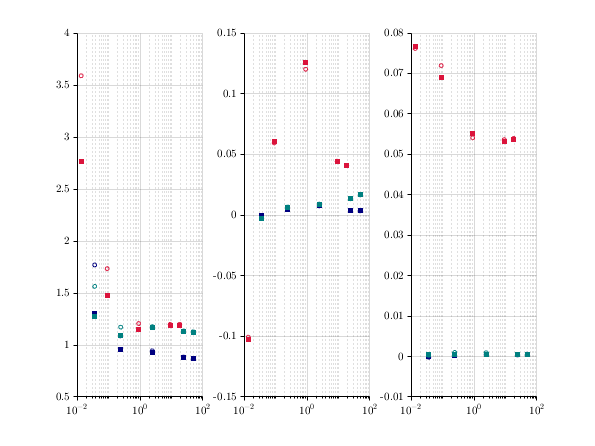

In [13]:
clear res
res.geo(1).s_geo = 'longitudinal';
res.geo(2).s_geo = 'transverse';
res.geo(3).s_geo = 'deck';

res.s_mk{1,1} = 'o';
res.s_mk{1,2} = 4;

res.s_mk{2,1} = 's';
res.s_mk{2,2} = 5;

res.s_c{1} = rgb('Navy');
res.s_c{2} = rgb('Teal');
res.s_c{3} = rgb('Crimson');


id_pause = true;
figure(1)
clf

ll = 1;
for id_geo = 1:3
for ii = 1:sb.Re_n
    res.geo(id_geo).sb(ll).Re(ii) = sb.Re_pool(ii);
    switch id_geo
        case {1,2}
            load(sprintf('tower/tower_%s_turbulent_SST_Re%d', ...
                res.geo(id_geo).s_geo, res.geo(id_geo).sb(ll).Re(ii)));
        case 3
            load(sprintf('deck/deck_%s_a000_turbulent_SST_Re%d', ...
                'upper', res.geo(id_geo).sb(ll).Re(ii)));
        % otherwise
    end

% if ii == 1
    res.geo(id_geo).sb(ll).BD = [sb.B,sb.D];
% end

    switch id_geo
        case {1,3}
            sc = [1 sb.D/sb.B (sb.D/sb.B)^2];
        case 2
            sc = [sb.D/sb.B 1 1];
        % otherwise
    end
res.geo(id_geo).sb(ll).res(ii,1:6) = sb.res(ii).C.DLM(1:6)*diag([sc sc]);

    for jj=1:3
        subplot(1,3,jj)
        semilogx(sb.U(res.geo(id_geo).sb(ll).Re(ii)), ...
            res.geo(id_geo).sb(ll).res(ii,jj), ...
            'o', 'Color',res.s_c{id_geo}, 'MarkerSize', 6-3)
            % 'Color',rgb('Navy'), 'MarkerSize', res.geo(id_geo).sb(.s_mk{2})
    end
    if id_pause
        gcfG;gcfH;gcfLFont;gcfS;%gcfP
        id_pause = false;
    end
    for jj=1:3
        subplot(1,3,jj)
        h = semilogx(sb.U(res.geo(id_geo).sb(ll).Re(ii)), ...
            res.geo(id_geo).sb(ll).res(ii,jj+3), ...
            's', 'Color',res.s_c{id_geo}, 'MarkerSize', 6-2);
        h.MarkerFaceColor = h.Color;
    end
end
end

# FINE